### Tensorflow and sklearn

In [ ]:
import pandas as pd

housing_pd = pd.read_csv('housing.csv')
housing_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing_pd['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### Shuffle the dataset to randomise the rows

In [ ]:
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd), random_state=1)
housing_pd_shuffled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN


#### convert Ocean proximity column to numerical

In [ ]:
pd.get_dummies(housing_pd_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


#### Drop ocean proximity column

In [ ]:
housing_pd_shuffled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


#### Replace with the numerical ocean proximity

In [ ]:
housing_pd_final = pd.concat([housing_pd_shuffled.drop('ocean_proximity', axis=1),
                              pd.get_dummies(housing_pd_shuffled['ocean_proximity'])], axis=1)
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,1,0,0,0,0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,1,0,0,0,0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,1,0,0,0,0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,0,1,0,0,0


In [ ]:
# The input variables
housing_pd_final = housing_pd_final[['longitude',	'latitude',	
                                     'housing_median_age',	'total_rooms',	
                                     'total_bedrooms',	'population',	
                                     'households',	'median_income',	
                                     '<1H OCEAN',	
                                     'INLAND',	'ISLAND',	
                                     'NEAR BAY',	'NEAR OCEAN', 'median_house_value']]
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


#### Remove rows with the null values

In [ ]:
housing_pd_final = housing_pd_final.dropna()
len(housing_pd_final)

20433

#### Split data to training, testing and validation sets

In [ ]:
train_pd, test_pd, val_pd = housing_pd_final[:18000], housing_pd_final[18000:19217], housing_pd_final[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1218)

In [ ]:
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]  # converts into numpy arrays
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1217,))

#### Scaling and preprocessing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train[:, :8]) # number of variables (7 +1) - first 7 columns

def preprocessor(X):
  A = np.copy(X)
  A[:, :8] = scaler.transform(A[:, :8])
  return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

X_train_preprocessed = preprocessor(X_train)
X_train_preprocessed

array([[ 0.60344338, -0.73607301,  0.82084451, ...,  0.        ,
         0.        ,  0.        ],
       [-0.10512186,  0.53710782,  0.66177382, ...,  0.        ,
         0.        ,  0.        ],
       [-1.42245442,  0.98178495,  1.37759191, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.59346359, -0.7313922 , -0.61079167, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12738246, -0.7313922 ,  0.90037985, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.92279673, -0.94202873, -0.61079167, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
X_train.shape, X_val.shape, X_test.shape

((18000, 13), (1218, 13), (1217, 13))

In [ ]:
pd.DataFrame(X_train_preprocessed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.603443,-0.736073,0.820845,0.081039,0.315396,-0.276840,0.328234,-0.326667,1.0,0.0,0.0,0.0,0.0
1,-0.105122,0.537108,0.661774,-0.206526,-0.196843,-0.246809,-0.160526,-0.995001,0.0,1.0,0.0,0.0,0.0
2,-1.422454,0.981785,1.377592,-0.374924,-0.301674,0.098553,-0.244613,0.074459,0.0,0.0,0.0,1.0,0.0
3,-1.352596,1.019231,1.854804,-1.055419,-1.049782,-1.079740,-1.082862,-1.235508,0.0,0.0,0.0,1.0,0.0
4,0.718211,-0.848412,0.661774,-0.507894,-0.589957,-0.628385,-0.567825,0.687448,1.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

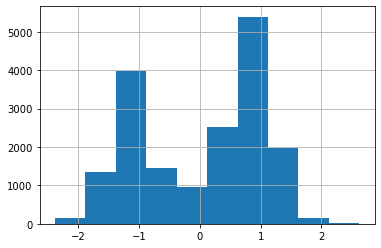

In [ ]:
pd.DataFrame(X_train_preprocessed)[0].hist()

#### Train the models using sklearn estimators

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)
mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val), y_val, squared=False) # compare the predictions with training and validation

(68597.44105390602, 71436.82952222903)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
mse(knn.predict(X_train), y_train, squared=False), mse(knn.predict(X_val), y_val, squared=False)

(53759.09908812057, 62161.22860469906)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10).fit(X_train, y_train)
mse(rfr.predict(X_train), y_train, squared=False), mse(rfr.predict(X_val), y_val, squared=False)

(43586.05613172219, 53498.19191018823)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train, y_train)
mse(gbr.predict(X_train), y_train, squared=False), mse(gbr.predict(X_val), y_val, squared=False)

(47274.82259072157, 51380.157990645246)

### Lets make three different neural networks

In [ ]:
from tensorflow.keras.models import Sequential # in order instead of layers
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# Simple neural network
simple_nn = Sequential()
simple_nn.add(InputLayer((13,))) # 13 inputs (the predictors)
simple_nn.add(Dense(2, 'relu')) # reduce the predictors to two
simple_nn.add(Dense(1, 'linear')) # linear means a continuous variable

# optimiser
opt = Adam(learning_rate=.1) # can change the rate like +10 but .1 does better
cp = ModelCheckpoint('models/simple_nn', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100) # Fit the model

## check at the least val loss

Epoch 1/100
563/563 [==============================] - 6s 4ms/step - loss: 53841645568.0000 - root_mean_squared_error: 232038.0312 - val_loss: 49742569472.0000 - val_root_mean_squared_error: 223030.4219
INFO:tensorflow:Assets written to: models\simple_nn\assets
Epoch 2/100
563/563 [==============================] - 2s 4ms/step - loss: 42032955392.0000 - root_mean_squared_error: 205019.4062 - val_loss: 34284482560.0000 - val_root_mean_squared_error: 185160.6875
INFO:tensorflow:Assets written to: models\simple_nn\assets
Epoch 3/100
563/563 [==============================] - 2s 4ms/step - loss: 24941699072.0000 - root_mean_squared_error: 157929.4062 - val_loss: 17566236672.0000 - val_root_mean_squared_error: 132537.6875
INFO:tensorflow:Assets written to: models\simple_nn\assets
Epoch 4/100
563/563 [==============================] - 2s 4ms/step - loss: 12080143360.0000 - root_mean_squared_error: 109909.7031 - val_loss: 8622441472.0000 - val_root_mean_squared_error: 92857.1016
INFO:tensorfl

In [ ]:
# train model
from tensorflow.keras.models import load_model

simple_nn = load_model('models/simple_nn')
mse(simple_nn.predict(X_train), y_train, squared=False), mse(simple_nn.predict(X_val), y_val, squared=False)

(68105.09583438681, 71110.4627042067)

#### Medium neural network

In [ ]:
medium_nn = Sequential()
medium_nn.add(InputLayer((13,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/medium_nn', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 [==============================] - 4s 5ms/step - loss: 8699912192.0000 - root_mean_squared_error: 93273.3203 - val_loss: 4887042048.0000 - val_root_mean_squared_error: 69907.3828
INFO:tensorflow:Assets written to: models\medium_nn\assets
Epoch 2/100
563/563 [==============================] - 3s 5ms/step - loss: 4511618048.0000 - root_mean_squared_error: 67168.5781 - val_loss: 4787462144.0000 - val_root_mean_squared_error: 69191.4922 4558308352.
INFO:tensorflow:Assets written to: models\medium_nn\assets
Epoch 3/100
563/563 [==============================] - 3s 5ms/step - loss: 4372787712.0000 - root_mean_squared_error: 66127.0547 - val_loss: 4883715072.0000 - val_root_mean_squared_error: 69883.5859t_mean_squared_error: 6460 - ETA: 1s - loss:
Epoch 4/100
563/563 [==============================] - 3s 5ms/step - loss: 4323586048.0000 - root_mean_squared_error: 65753.9844 - val_loss: 4523317248.0000 - val_root_mean_squared_error: 67255.6094
INFO:tensorflow:Assets written

In [ ]:
# Train the model
medium_nn = load_model('models/medium_nn')
mse(medium_nn.predict(X_train), y_train, squared=False), mse(medium_nn.predict(X_val), y_val, squared=False)

(51311.96112876573, 55719.479905283704)

#### Large neural network

In [ ]:
large_nn = Sequential()
large_nn.add(InputLayer((13,)))
large_nn.add(Dense(256, 'relu')) #### Add some layers and divide by 2, maybe
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/large_nn', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 [==============================] - 6s 9ms/step - loss: 6239121920.0000 - root_mean_squared_error: 78988.1094 - val_loss: 4966287872.0000 - val_root_mean_squared_error: 70471.8906
INFO:tensorflow:Assets written to: models\large_nn\assets
Epoch 2/100
563/563 [==============================] - 5s 8ms/step - loss: 4512237568.0000 - root_mean_squared_error: 67173.1875 - val_loss: 4893030912.0000 - val_root_mean_squared_error: 69950.2031
INFO:tensorflow:Assets written to: models\large_nn\assets
Epoch 3/100
563/563 [==============================] - 4s 8ms/step - loss: 4133085696.0000 - root_mean_squared_error: 64289.0781 - val_loss: 4567281664.0000 - val_root_mean_squared_error: 67581.6641
INFO:tensorflow:Assets written to: models\large_nn\assets
Epoch 4/100
563/563 [==============================] - 4s 7ms/step - loss: 3864426752.0000 - root_mean_squared_error: 62164.5117 - val_loss: 4501318656.0000 - val_root_mean_squared_error: 67091.8672
INFO:tensorflow:Assets written

#### To show how good the modelis

In [ ]:
large_nn = load_model('models/large_nn')
mse(large_nn.predict(X_train), y_train, squared=False), mse(large_nn.predict(X_val), y_val, squared=False)

(46453.999894207904, 53604.151459795976)

In [ ]:
mse(gbr.predict(X_test), y_test, squared=False)

49343.558115024265

#### Based on accuracy, we will choose Gradient boosting which gave the best results